In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load data and perform exploratory data analysis

     AGE  Rooms  Dist_Emp_Center  MEDV
0   65.2  6.575           4.0900  24.0
1   78.9  6.421           4.9671  21.6
2   61.1  7.185           4.9671  34.7
3   45.8  6.998           6.0622  33.4
4   54.2  7.147           6.0622  36.2
5   58.7  6.430           6.0622  28.7
6   66.6  6.012           5.5605  22.9
7   96.1  6.172           5.9505  27.1
8  100.0  5.631           6.0821  16.5
9   85.9  6.004           6.5921  18.9


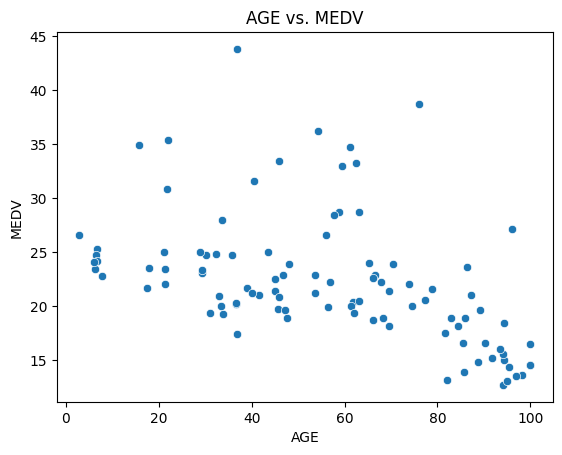

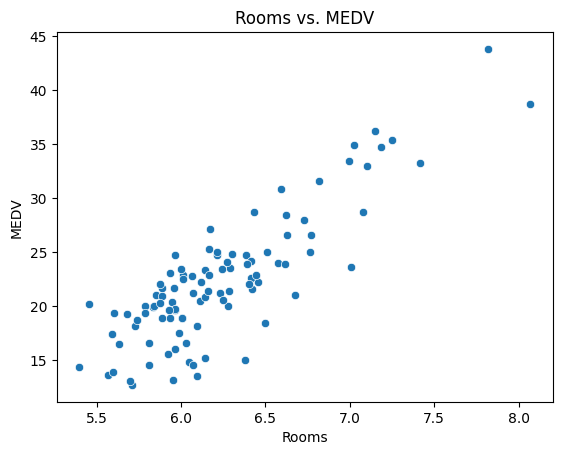

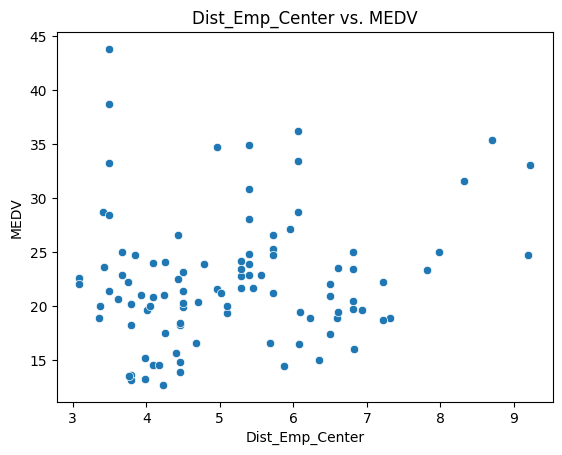

In [2]:
columns = ['Crime Per Capita', 'ZN', 'INDUS', 'CHAS', 'NOX', 'Rooms', 'AGE', 'Dist_Emp_Center', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = pd.read_csv("./housing.csv", header=None, delimiter=r"\s+", names = columns)
## Retain only 2 features and reduce the data for testing single variable and 2 variable linear regression
housing_data = housing_data.head(100)
housing_data = housing_data[['AGE', 'Rooms', 'Dist_Emp_Center','MEDV']]
print(housing_data.head(10))
Features = ['AGE', 'Rooms', 'Dist_Emp_Center']
Target = ['MEDV']

## Plot each featuer against the target value to understand the relationship
for feature in Features:
    sns.scatterplot(x=feature, y='MEDV', data=housing_data)
    plt.title(f'{feature} vs. MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

#### Based on above lets pick age and rooms as parameters for regression, though age does not have proper linear relationship with price

## Code for Linear Regression with single Feature

In [17]:
def normalizeData(X):
    mean = np.mean(X)
    sd = np.std(X)
    return mean, sd, (X - mean)/sd

def reverse_normalization(scaled_value, actual_value):
    original_value = (scaled_value * std_dev) + mean
    return original_value

def costFunction(y_actual, y_pred):
    e = np.sum((y_pred-y_actual) ** 2)
    m = 2 * y_pred.shape[0]
    cost = e/m
    return cost

def gradient(e, X):
    m = X.shape[0]
    dj_dw = (1/m) * np.dot(X.T, e)
    dj_db = (1/m) * np.sum(e)
    return dj_dw, dj_db

def regressionWithGradientDescent(X, y):
    w = 0
    b = 10
    iterations = 1000
    iteration_hist = []
    cost_hist = []
    w_hist = []
    b_hist = []
    alpha = 0.01
    for iteration in range(iterations):
        w_hist.append(w)
        b_hist.append(b)
        iteration_hist.append(iteration)
        y_pred = np.dot(X,w) + b
        cost = costFunction(y, y_pred)
        cost_hist.append(cost)
        e = y_pred - y
        dw, db = gradient(e, X )
        w = w - ( alpha * dw )
        b = b - ( alpha * db )
    return w, b, cost_hist, iteration_hist, w_hist, b_hist

w=0.19418790456014648, b=3.119269674767
R Square for custom linear regression is 0.7164838771543837


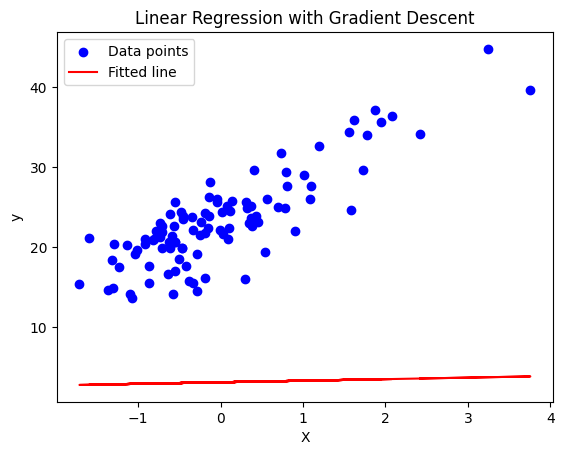

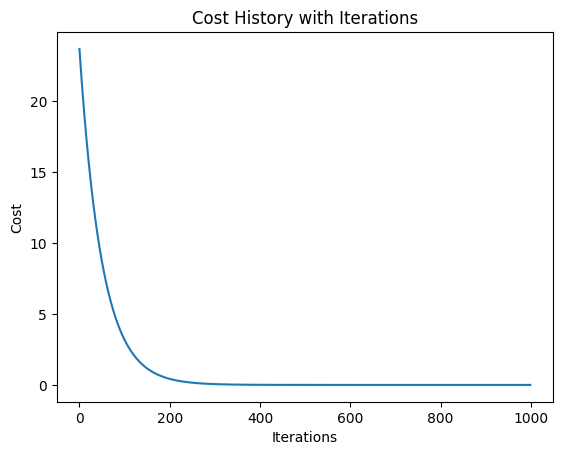

In [94]:
X = housing_data[ "Rooms" ]
y = housing_data[ "MEDV" ]
y = np.log1p(y)
mean, sd, X = normalizeData(X)
w , b, cost_hist, iteration_hist,w_hist, b_hist = regressionWithGradientDescent(X, y )

print( f"w={w}, b={b}")

y = np.exp(y.values)
y_pred = np.exp(np.dot(X,w) + b)
r_squared = r2_score(y, y_pred) 
print(f"R Square for custom linear regression is {r_squared}")

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the fitted line
plt.plot(X, np.dot(X,w) + b, color='red', label='Fitted line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()

# Show the plot
plt.show()

# Plot the cost history with iterations
plt.plot(iteration_hist, cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History with Iterations')
plt.show()

## Linear regression using scikit learn and compare the outptu

R Square for custom linear regression is 0.7165734030076694


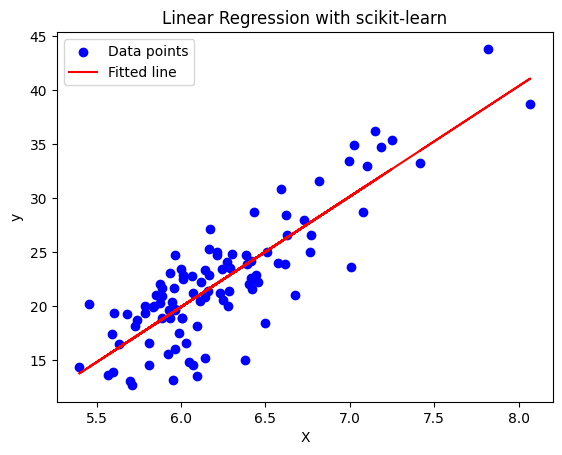

Coefficient (w): 10.223463401699545
Intercept (b): -41.42826246618968


In [93]:
X = housing_data[ "Rooms" ].values.reshape(-1,1)
y = housing_data[ "MEDV" ].values.reshape(-1,1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
w = model.coef_[0][0]
b = model.intercept_[0]

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred) 
print(f"R Square for custom linear regression is {r_squared}")

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the fitted line
plt.plot(X, model.predict(X), color='red', label='Fitted line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with scikit-learn')
plt.legend()

# Show the plot
plt.show()

# Print the coefficients and intercept
print("Coefficient (w):", w)
print("Intercept (b):", b)

